In [10]:
import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('human_cognitive_performance.csv')
df.head()

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78


In [12]:
df = df.drop('AI_Predicted_Score', axis=1)
df.head()

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54


In [13]:
featureset = df[['Age', 'Gender', 'Sleep_Duration', 'Stress_Level', 'Diet_Type', 'Daily_Screen_Time', 'Exercise_Frequency',
                 'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score', 'Cognitive_Score']]

In [14]:
featureset['Gender']=featureset['Gender'].astype('category').cat.codes
featureset['Diet_Type']=featureset['Diet_Type'].astype('category').cat.codes
featureset['Exercise_Frequency']=featureset['Exercise_Frequency'].astype('category').cat.codes

C:\Users\Amin\AppData\Local\Temp\ipykernel_1964\3862308371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureset['Gender']=featureset['Gender'].astype('category').cat.codes
C:\Users\Amin\AppData\Local\Temp\ipykernel_1964\3862308371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureset['Diet_Type']=featureset['Diet_Type'].astype('category').cat.codes
C:\Users\Amin\AppData\Local\Temp\ipykernel_1964\3862308371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [15]:
X = featureset.values
min_max_scaler = StandardScaler()
feature_mtx = min_max_scaler.fit_transform(X)

In [16]:
epsilon = 1
minimumSamples = 2
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(feature_mtx)
labels = db.labels_

In [17]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

Estimated number of clusters: 5777
Estimated number of noise points: 20600


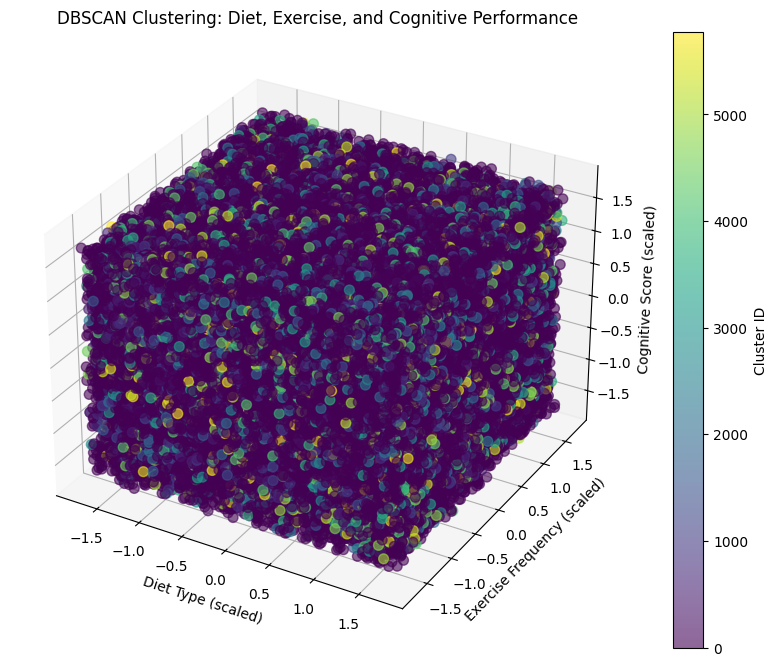

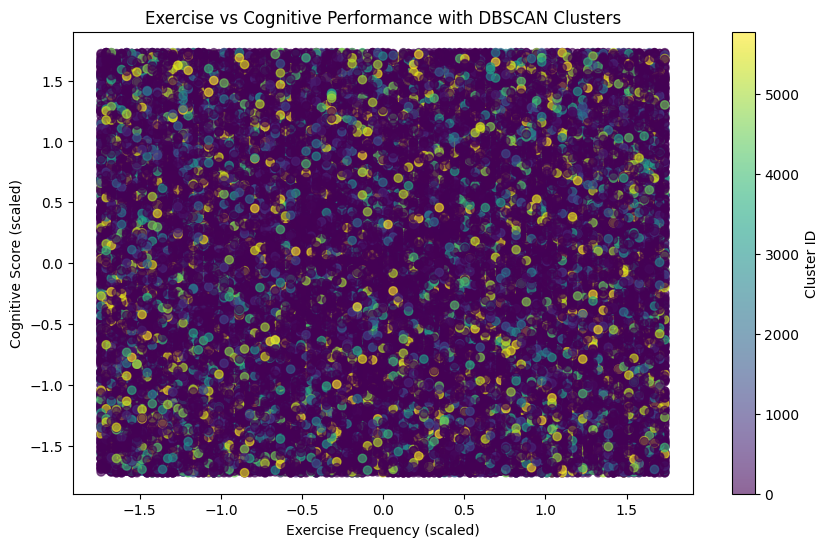

In [18]:
# Visualization: Diet vs Exercise vs Cognitive Score
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Get the indices of the features we want to plot
diet_idx = featureset.columns.get_loc('Sleep_Duration')
exercise_idx = featureset.columns.get_loc('Daily_Screen_Time')
cognitive_idx = featureset.columns.get_loc('Caffeine_Intake')

# Scatter plot
scatter = ax.scatter(feature_mtx[:, diet_idx], 
                     feature_mtx[:, exercise_idx], 
                     feature_mtx[:, cognitive_idx], 
                     c=labels, cmap='viridis', s=50, alpha=0.6)

ax.set_xlabel('Diet Type (scaled)')
ax.set_ylabel('Exercise Frequency (scaled)')
ax.set_zlabel('Cognitive Score (scaled)')
plt.title('DBSCAN Clustering: Diet, Exercise, and Cognitive Performance')
plt.colorbar(scatter, label='Cluster ID')
plt.show()

# 2D Visualization: Exercise vs Cognitive Score
plt.figure(figsize=(10, 6))
plt.scatter(feature_mtx[:, exercise_idx], feature_mtx[:, cognitive_idx], 
            c=labels, cmap='viridis', alpha=0.6)
plt.xlabel('Exercise Frequency (scaled)')
plt.ylabel('Cognitive Score (scaled)')
plt.title('Exercise vs Cognitive Performance with DBSCAN Clusters')
plt.colorbar(label='Cluster ID')
plt.show()